### ASTR 324, University of Washington


# Week 5.1: Introduction to Bayesian Inference




##### Resources for this notebook include:

- [Textbook](http://press.princeton.edu/titles/10159.html) Chapter 5.  
- [Jake VanderPlas's workshop "Bayesian Astronomy"](https://github.com/jakevdp/BayesianAstronomy)
- [Jake VanderPlas's blog "Frequentism and Bayesianism: A Practical Introduction"](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/)


##### Highly recommended supplemental background reading:

- [Mario Juric: Frequentist vs. Bayesian Perspectives (LSSTC Data Science Fellowship Program Lecture)](https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/tree/master/Session4/Day1)
- [Jake VanderPlas: ``Frequentism and Bayesianism: A Python-driven Primer"](https://arxiv.org/abs/1411.5018)
- [Hogg, Bovy and Lang: ``Data analysis recipes: Fitting a model to data"](https://arxiv.org/abs/1008.4686)


##### For those who want to dive deep:

- [D. Sivia and J. Skilling: ``Data Analysis: A Bayesian Tutorial''](https://www.amazon.com/Data-Analysis-Bayesian-Devinderjit-Sivia/dp/0198568320)
- [E.T. Jaynes: ``Probability Theory: The Logic of Science''](http://bayes.wustl.edu/etj/prob/book.pdf)
- [E.T. Jaynes: ``Confidence Intervals vs. Bayesian intervals''](http://bayes.wustl.edu/etj/articles/confidence.pdf)

### The Meaning of $\hat{\mu} \pm \sigma$, in Maximum Likelihood

What is the meaning of $\hat{\mu} \pm \sigma$?

### The Meaning of $\hat{\mu} \pm \sigma$, in Maximum Likelihood

In [1]:
%matplotlib inline

def demo():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import norm
    
    p = norm(10, 2)
    x = np.linspace(0, 20, 1000)
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(x, p.pdf(x))
    plt.xlabel(r"$\mu$")
    plt.ylabel(r"$p({data}|{\rm true\,value} = \mu)$")
    plt.title(r"Illustrating the meaning of $\hat{\mu}\pm\sigma$")
    plt.text(0.97, 0.9, r"$\hat\mu = 10 \pm 2$", transform=plt.gca().transAxes, horizontalalignment='right')

    # visualize the interval between 6.9 and 7.1
    plt.vlines(6.9, 0, p.pdf(6.9), color='brown')
    plt.vlines(7.1, 0, p.pdf(7.1), color='brown')

    plt.ylim(0, 1.1*p.pdf(10))

    plt.show()
    print("p(data | 6.9 < μ < 7.1) = %.3f" % (p.cdf(7.1) - p.cdf(6.9)))

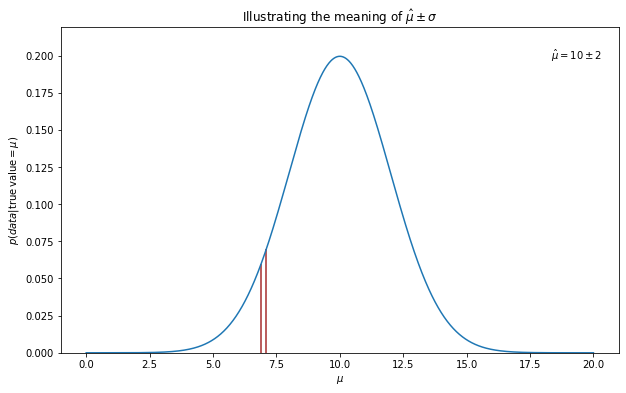

p(data | 6.9 < μ < 7.1) = 0.013


In [2]:
demo()

"The probability the collected measurements would be obtained, if the true value was some $\mu$."

Note the subtlety in the wording: it tells us about the probability of obtaining the measurements **if** the true value was some $\mu$, but ***tells us nothing about the probability of the true value being some $\mu$***!

These two are different things (remember the testing example from Week 2: probability of test returning false if you have the disease can be very different from the probability of having the disease if the test returns positive!).

This should be easy to solve -- we need the prior probability of the true value, and then apply the Bayes theorem, right?

Almost. There's a conceptual difficulty we first need to overcome.

## Definition of Probability
Clasically, probability is defined in terms of **a limiting case of repeated measurements**:

$$P(x) = \lim_{N\to\infty} \frac{N_{\rm x}}{N}$$

That is, if I measure the photon flux $F$ from a given star (we'll assume for now that the star's flux does not vary with time), then measure it again, then again, and so on, each time I will get a slightly different answer due to the statistical error of my measuring device. In the limit of a large number of measurements, the frequency of any given value indicates the probability of measuring that value.

In this framework, **probabilities are fundamentally related to frequencies of events**. This means, for example, that **in this strict ("frequentist") view, it is meaningless to talk about the probability of the true flux of the star: the true flux is (by definition) a single fixed value**. To talk about a frequency distribution for a fixed value would be nonsense!

## Bayesian Probability

We need to fix this. What do we mean when we say that the probability of a fixed parameter is equal to 50%? We're quantifying our **certainty**, our **knowledge**, our **degree of belief** in its value.

Can we redefine the concept of probability to cover **degrees of certainty about statements**? I.e., make it an **extension of logic** to statements where there's uncertainty? Yes! (see [Cox's Theorem](https://en.wikipedia.org/wiki/Cox%27s_theorem)).

The result of ***this extension of logic follows the same laws as classically defined probability***. This is Bayesian probability. In the Bayesian framework, **probabilities are fundamentally related to our own <u>knowledge</u> of something**, rather than frequencies.

This means, for example, that **in a Bayesian view, we can meaningfully talk about the probability that the true flux of a star lies in a given range.** Or talk about **the probability a hypothesis is correct**.

## Why is this important?

Because if one adopts the Bayesian definition of probability, one can ask questions such as:

* Given all I know (my measurements, the literature), what is the probability that a parameter $\theta$ is so-and-so?
* Given all I know (my measurements, the literature), what is the probability that a model is true?

And this is, intuitively, ***what a scientist wants to know***. Side note: [Cox was a physicist](https://en.wikipedia.org/wiki/Richard_Threlkeld_Cox).

The price we pay is having to specify ***a prior***.

### Brief History 

The Reverend **Thomas Bayes** (1702–1761) was a British amateur mathematician who wrote a manuscript 
on how to combine an initial belief with new data to arrive at an improved belief. The manuscript 
was published posthumously in 1763 and gave rise to the name Bayesian statistics.  

The first renowned mathematician to popularize Bayesian methodology was **Pierre Simon Laplace**, 
who rediscovered (1774) and greatly clarified Bayes' principle. Laplace applied the principle 
to a variety of contemporary problems in astronomy, physics, population statistics, and even 
jurisprudence. One of the most famous results is his estimate of the mass of Saturn and its 
uncertainty, which remain consistent with the best measurements of today. 

**Laplace said: "I find that it is a bet of 11,000 against one that the error of this result is not 1/100th 
of its value".** Therefore, Laplace clearly interpreted measurements as giving a probability
statement about the mass of Saturn, although there is only one Saturn and its true mass is 
what it is, and it is not a random variable according to frequentist statistics.

Despite Laplace's fame, Bayesian analysis did not secure a permanent place in science.
Instead, classical frequentist statistics was adopted as the norm (this could be at least
in part due to the practical difficulties of performing full Bayesian calculations without the
aid of computers). Much of Laplace's Bayesian analysis was ignored until the early twentieth
century when **Harold Jeffreys** reinterpreted Laplace's work with much clarity. 
Yet, even Jeffreys' work was not fully comprehended until around 1960, when it took off thanks
to vocal proponents such as de Finetti, Savage, Wald, and **Jaynes**, and of course, the advent of
computing technology. 
 

## Bayesian Statistical Inference

Bayes' Rule, when applied to our degree of belief about a model, is:

$$p(M\,|\,D) = \frac{p(D\,|\,M)\,p(M)}{p(D)},$$

where $D$ is for data and $M$ is for model. Or in words, 

$${\rm Posterior \,\, Probability} = \frac{ {\rm Likelihood}\times{\rm Prior} }{ {\rm Evidence} }.$$

If we explicitly recognize prior information, $I$, and the model parameters, $\theta$, then we can write:

$$p(M,\theta \,|\,D,I) = \frac{p(D\,|\,M,\theta,I)\,p(M,\theta\,|\,I)}{p(D\,|\,I)},$$

**A few notes**:

  * Prior, Posterior, Likelihood, and Evidence are simply the names we give to the terms in the Bayes theorem.

  * It is usually the case that $p(D\,|\,I)$ is not evaluated explictly since the posterior probability can be (re)normalized (it has to integrate to 1). Thus we frequently write:
  
  $$p(M,\theta \,|\,D,I) \propto p(D\,|\,M,\theta,I)\,p(M,\theta\,|\,I)$$
  
  * The meaning of $p(M,\theta \,|\,D,I)$ is "the joint probability (density) of the model M being true and having parameter values $\theta$, given the data and the prior information". If the model is known to be true (i.e., we know the physics and the measurement apparatus), we can consider the knowledge of $M$ being true a part of the prior information, $I$, and write:

  $$p(\theta \,|\,D,I) = \frac{p(D\,|\,\theta,I)\,p(\theta\,|\,I)}{p(D\,|\,I)},$$

  * We sometimes omit the explict dependence on $\theta$ by writing $M$ instead of $M,\theta$ where appropriate (or we sometimes omit $M$!). E.g., here's us taking as implicit the prior information $I$ and the model $M$:

  $$p(\theta \,|\,D) = \frac{p(D\,|\,\theta)\,p(\theta)}{p(D)},$$

  In general, you'll notice *a lot* of playing fast-and-loose with notation, with many assumptions being implicit. You'll almost always have to read it in context to understand what the author meant.


### The Bayesian Statistical Inference process

1. Chosee an appropriate prior, $p(M,\theta\,|\,I)$, which incorporates *information beyond the data to be collected.*
1. Choose the appropriate statistical model, write the likelihood $p(D\,|\,M,\theta,I) \equiv L(\theta)$
1. Compute the posterior pdf, $p(M,\theta \,|\,D,I)$, following the Bayes rule.<br><br>

1. Optional: Search for the model parameters that maximize $p(M,\theta \,|\,D,I)$ to derive a point estimate (a "best fit").
1. Optional: Quantify the uncertainty of the point estimate with "error bars".

### Likelihood: the same as MLE

For example, assume $N$ measurements, $\{x_i\}$, where the uncertainty for each measurement is Gaussian with
a known $\sigma_i$. The likelihood of one measurement is 

$$L \equiv p(x_i|\mu,\sigma_i) = \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma_i^2}\right).$$


and therefore the likelihood of all N measurements is

$$L \equiv p(\{x_i\}|\mu,\sigma_i) = \prod_{i=1}^N \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma_i^2}\right).$$

#### A toy example with 3 measurements

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=16, usetex=False)

In [4]:
### Draw three measurements
np.random.seed(42)
sampleSize=3
mu = 1.0
sigma = 0.2 
sample = norm(mu, sigma).rvs(sampleSize) 
print(sample)

[1.09934283 0.97234714 1.12953771]


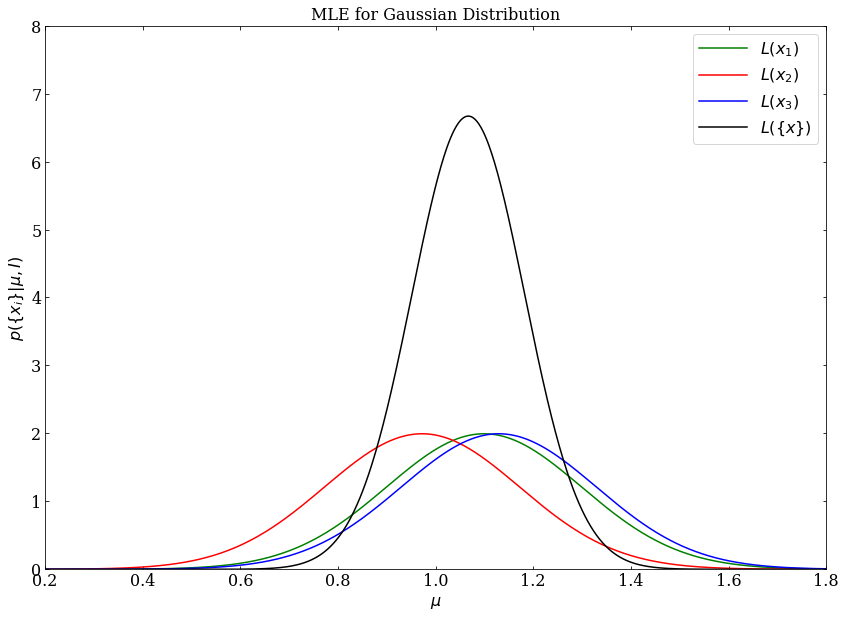

In [5]:
### now compute likelihoods given by each point
muGrid = np.linspace(0,2,1000)
L1 = norm(sample[0], sigma).pdf(muGrid) 
L2 = norm(sample[1], sigma).pdf(muGrid) 
L3 = norm(sample[2], sigma).pdf(muGrid) 
L = L1 * L2 * L3
# plot
fig, ax = plt.subplots(figsize=(14, 10))
plt.plot(muGrid, L1, ls='-', c='green', label=r'$L(x_1)$')
plt.plot(muGrid, L2, ls='-', c='red', label=r'$L(x_2)$')
plt.plot(muGrid, L3, ls='-', c='blue', label=r'$L(x_3)$')
plt.plot(muGrid, L, ls='-', c='black', label=r'$L(\{x\})$')

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(\{x_i\}|\mu,I)$')
plt.title('MLE for Gaussian Distribution')
plt.legend()
plt.show() 

#### Priors: What if I told you that we have prior information showing that mu>0.9?

This is prior knowledge.

How would you express it mathematically?


#### Priors: What if I told you that we have prior information showing that mu>0.9?

That's simply:

$$p(\mu|I) \propto {\rm const.}\;\;\;\;\;\; {\rm if} \mu > 0.9$$

and zero otherwise.

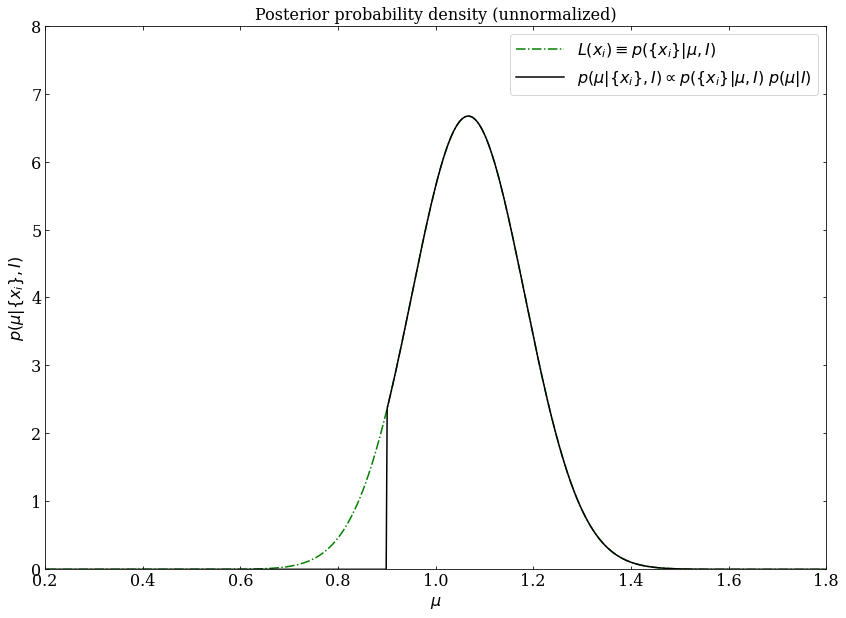

In [6]:
### Prior
P = np.zeros(len(muGrid))
P[muGrid > 0.9] = 1

### Likelihood of obtaining the dataset
L = L1 * L2 * L3

### Posterior (unnormalized)
PP = L*P

# plot
fig, ax = plt.subplots(figsize=(14, 10))
plt.plot(muGrid, L, ls='-.', c='green', label=r'$L({x_i}) \equiv  p(\{x_i\} |\mu, I)$')
plt.plot(muGrid, PP, ls='-', c='black', label=r'$p(\mu|\{x_i\}, I) \propto p(\{x_i\} |\mu, I)\; p(\mu | I)$')

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(\mu|\{x_i\},I)$')
plt.title('Posterior probability density (unnormalized)')
plt.legend()
plt.show() 

## Bayesian Inference output: Probability distribution function of model parameters

The output in the preceeding section was the ***full probability distribution function*** of model parameters:

$$ p(\boldsymbol\theta|D, I) $$

This is the output of Bayesian inference.

Point estimates (say, the most likely $\mu$, or the median $\mu$) or interval estimates ($\mu \pm \sigma$) are ways to ***summarize*** this information, but the ***fundamental, complete, result is the posterior PDF***.

**This is quite profound: there's no such thing as a one correct result (a single number); there are probabilities assigned to every possible result (the entire parameter space)!**

### Bayesian Updating: Yesterday's Posterior is Today's Prior

The prior information can be (and usually is) based on prior measurements.

![Turtles all the way down](figures/River_terrapin.jpg)

In [7]:
def plot_bayesian_update(ax, PP, L, P, label):
    ax.plot(muGrid, P,  ls='-', c='black', label=r'prior')
    ax.plot(muGrid, L, ls=':',  c='blue', label=r'likelihood')
    ax.plot(muGrid, PP, ls='-.',  c='green', label=r'posterior')

    ax.text(.05, .9, "Adding", transform=ax.transAxes)
    ax.text(.05, .8, label, transform=ax.transAxes)
    ax.legend()

    ax.set_xlim(0.2, 1.8)
    ax.set_ylim(0, 11.5)
    ax.set_xlabel('$\mu$')
    ax.set_ylabel(r'$p(\mu|{\rm data\,so\,far})$')

### Example: Bayesian Updating

Problem: I wish to estimate the location $\mu$ of an object from a series of measurements made using an apparatus that adds Gaussian errors with heteroscedastic but known uncertainties.

Let's observe how our knowlege changes as we incorporate information from three measurements:

$$ x_1 = 0.8 \pm 0.05$$
$$ x_2 = 1.2 \pm 0.4$$
$$ x_3 = 0.85 \pm 0.05$$

, one by one.

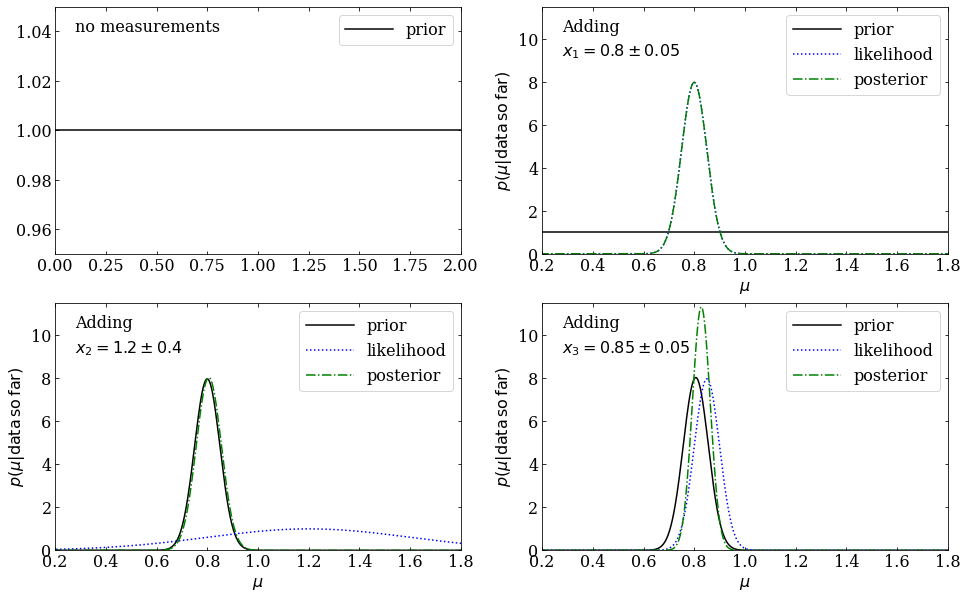

In [8]:
### What happens as we add measurements
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

dx = muGrid[1]-muGrid[0]

## our initial state of knowledge
P = np.ones_like(muGrid)
ax[0, 0].plot(muGrid, P, ls='-', c='black', label=r'prior')
ax[0, 0].text(.05, .9, "no measurements", transform=ax[0, 0].transAxes)
ax[0, 0].legend()

## first measurement
x, xerr = 0.8, 0.05
L = norm(x, xerr).pdf(muGrid)   # likelihood
PP = L * P                      # posterior is proportional to likelihood * prior
PP /= (PP*dx).sum()             # let's normalize it so it integrates to 1
plot_bayesian_update(ax[0, 1], PP, L, P, rf"$x_1 = {x} \pm {xerr}$")

## second measurement
x, xerr = 1.2, 0.4
P = PP                          # old posterior is the new prior
L = norm(x, xerr).pdf(muGrid)   # likelihood
PP = L * P                      # posterior is proportional to likelihood * prior
PP /= (PP*dx).sum()             # let's normalize it so it integrates to 1
plot_bayesian_update(ax[1, 0], PP, L, P, rf"$x_2 = {x} \pm {xerr}$")

## third measurement
x, xerr = 0.85, 0.05
L = norm(x, xerr).pdf(muGrid)   # likelihood
P = PP                          # old posterior is the new prior
PP = L * P                      # posterior is proportional to likelihood * prior
PP /= (PP*dx).sum()             # let's normalize it so it integrates to 1
plot_bayesian_update(ax[1, 1], PP, L, P, rf"$x_3 = {x} \pm {xerr}$")

This is in general how Bayesian inference (and science) should work: new data add new information which we incorporate into the overall body of knowledge through the application of Bayes' theorem.

The reality is more complex: here we rely on measurements being correctly characterized (i.e., the likelihood being correct; the measurement errors known). If they're not, this process will fail. Also, sometimes the likelihoods are not reported in papers, or they're too complex to compute exactly.

Therefore, in practice, there's still human judgement to be applied: read the paper, understand its measurement process, understand how much to trust its reported results, and then apply the Bayes theorem to the extent possible.

## Selecting Uninformative Priors

### An example of a difficulty with the MLE 

Imagine you arrive at a bus stop, and observe that the bus arrives $t$ minutes later 
(it is assumed that you had no knowledge about the bus schedule). What is the average time between two successive buses, $\tau$, if the buses keep a regular schedule? 

Here's an intuitive way to get to an answer:

> The wait time is distributed uniformly in the interval $0 \le t \le \tau$. If you arrive at a random time, on average you would wait for $t=\tau/2$ minutes.
>
> Rearranging this gives $\tau = 2t$, which seems intuitively reasonable.

#### What does the maximum likelihood approach say? 

1. Define the likelihood
2. Look for the maximum of the likelihood

#### Likelihood 

The probability that you will wait $t$ 
minutes is given by the uniform distribution (every $t$ is equally likely):

$$ p(t\,|\,\tau) =  1/\tau, $$

if $0 \le t \le \tau$ and $p(t|\tau)=0$ otherwise.

As we learned last week, when this function is understood as a function of the unknown parameter $\tau$, it's our likelihood, $L(\tau)$. Let's plot it as a function of both, to visualize and understand the difference:

In [9]:
def viz_bus_likelihood():
    def p(t, tau):
        p = np.zeros_like(t)
        p[(0 <= t) & (t <= tau)] = 1. / tau
        return p

    def L(t, tau):
        p = np.zeros_like(tau)
        mask = t <= tau
        p[mask] = 1. / tau[mask]
        return p

    fig, (axp, axL) = plt.subplots(ncols=2, figsize=(16, 6))

    # plot an example for tau=10
    tau = 10
    t = np.linspace(-2, 12, 1200)
    axp.plot(t, p(t, tau))
    axp.set_xlim(-2, 12)
    axp.set_ylim(0, 0.12)
    axp.set_xlabel(r"$t$")
    axp.set_ylabel(r"$p(t|\tau)$")
    axp.set_title(r"$p(t|\tau=10)=1/10$ as a function of t")
    
    # now plot the same as a function of tau, for t=10
    t = 10
    tau = np.linspace(5, 25, 2000)
    axL.plot(tau, L(t, tau))
    axL.set_xlim(5, 22)
    axL.set_ylim(0, 0.12)
    axL.set_xlabel(r"$\tau$")
    axL.set_ylabel(r"$p(t|\tau)$")
    axL.set_title(r"$p(t=10|\tau)=1/\tau$ as a function of $\tau$")

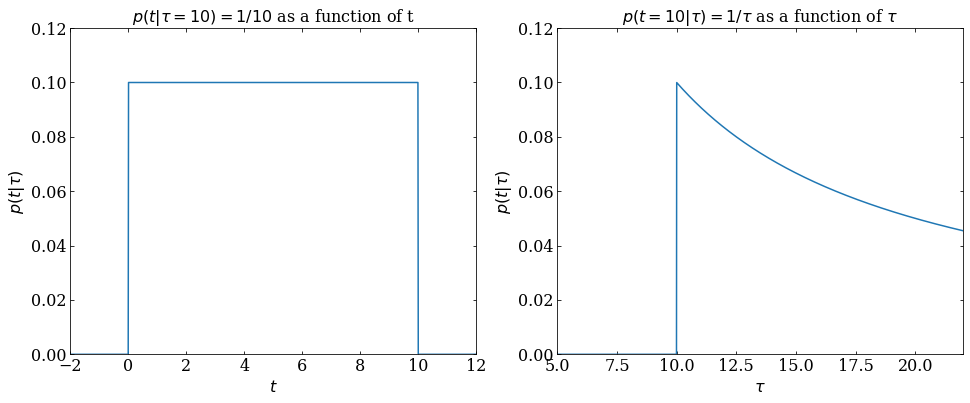

In [10]:
viz_bus_likelihood()

On the left, we have $p(t|\tau)=1/\tau$ as a function of $t$ for $\tau = 10$ (with limits $0 \le t \le \tau$ imposed by the problem). We think of it as the probability of measuring $t$ if $\tau = 10$.

On the right, we have the *same* function, $p(t|\tau)=1/\tau$, but now with $t=10$ given (we've measured a bus arrival time), and understood as a function of $\tau$ (as we're trying to find $\tau$ for which this measurement would be maximally likely). Now it looks rather different! The cutoff at $\tau = t$ is because it's impossible for the bus arrival interval to be smaller than the time you've observed.

Why didn't we notice such drammatic differences before? Because we've mostly dealt with Gaussian likelihoods, where the data and the model enter symmetrically:

$$ L_{\rm Gaussian} \propto \exp{ \frac{(x-\mu)^2}{2 \sigma^2} } $$

Plotting this functional form as a function of $x$ or $\mu$ results in a curve with the same shape. As we've just seen, that is far from being general!

#### Maximum Likelihood

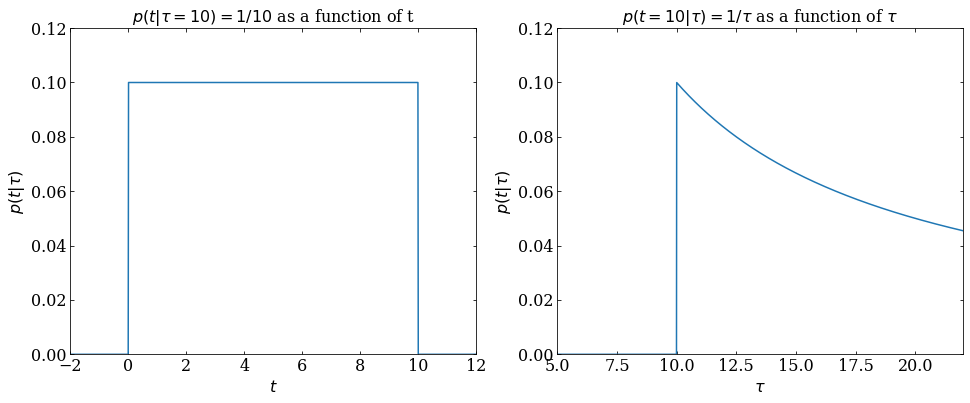

In [11]:
viz_bus_likelihood()

The maximum likelihood, then, corresponds to the smallest possible $\tau$ such that $t \le \tau$. 

This is satisfied by $\tau = t$, and *not* $\tau=2t$ as we expected from "common sense"!

In other words, MLE's trying to tell us that we've been very unlucky: we just missed the bus when we arrived at the bus stop, and had to wait for another full interval $\tau$! That's odd!

#### Bayesian approach

We first write out the Bayes rule:

$$p(\tau\,|\,t,I) = \frac{ p(t\,|\,\tau) \, p(\tau\,|\,I) }{ p(t\,|\,I) }.$$

What is our prior knowledge? How do we quantify it into the prior, $p(\tau\,|\,I)$?

### Bayesian priors

Priors can be **informative** or **uninformative**:
* Informative priors are based on existing information that might be available (including previously obtained data, experimental setup, etc).
* Uniformative priors can be thought of as "default" priors, i.e., what your prior is when you never seen
any data for this problem, e.g, a "flat" prior like $p(\theta, M|I) \propto {\rm C}$.

Detailed discussion can be found in Section 5.2 in the textbook.

There are three main principles used to choose an uninformative prior...

#### Assigning Uninformative Priors: 1. The Principle of Indifference

Assign a prior which doesn't favor any particular outcome.

Example: Assuming $1/6$ for a six-side die, or 1/2 for heads and tails of a fair coin, would be an example of indifference.

#### Assigning Uninformative Priors: 2. The Principle of Invariance (or Consistency)

The inference result should not change under transformations which leave the parameters invariant. Stated mathematically, if physics is invariant under some transformation $T$, then the probability must be as well:

$$ p(x) dx = p(y) dy $$

where:

$$ y = Tx $$

is the variable after the invariant transformation.

This most often applies to location and scale invariance.

**Location invariance** $(x \rightarrow x + \Delta)$: if we don't know the location of an object, the probability should be same no matter where we are. This suggests a uniform prior, within some accepted bounds: 

$$p(\theta|I) = \frac{1}{\theta_{max}-\theta_{min}} \;\; {\rm for} \;\; \theta_{min} \le \theta \le \theta_{max}$$

**Scale invariance** $(l \rightarrow c \cdot l )$: if we know nothing about the scale of the problem, probability should be the same no matter how large an object is. I.e., the probability of finding $l$ between $l$ and (say) $1.01 l$ shouldn't matter on whether $l$ is as small as micrometers or as large as megaparsecs.

This gives us priors of the form:

$$p(l|I) = \frac{C}{l} \;\; {\rm for} \;\; l_{min} \le l \le l_{max}$$

where C is chosen so $p(l|I)$ integrates to 1.

Proof:

$$ p(l)dl = \frac{C}{l} dl = C \frac{1}{l} dl \frac{c}{c} = C \frac{1}{c l} d(c l) = p(cl)d(cl) $$

#### Assigning Uninformative Priors: 3. The Principle of Maximum Entropy

We will not discuss it here - for more details, see Section 5.2.2 in the textbook.
 
Now, let's go back to the bus arrival problem. 

Note: We will skip examples of very steep priors and their consequences called in astronomy
literature **Eddington-Malmquist** and **Lutz-Kelker** biases (see Chapter 5 in the textbook
if you are interested). 

Question: what is the flavor of the parameter in our bus arrival problem?

Answer: $\tau$ is an interval, a length of time. It's a scale parameter.

Following the Principle of Invariance for scales, we assign the prior:

$$ p(\tau\,|\,I) \propto 1/ \tau.$$

i.e., every interval is equally likely.

The likelihood stays the same:

$$ p(t\,|\,\tau,I) =  1/\tau. $$  

if $0 \le t \le \tau$ and $p(t|\tau)=0$ otherwise.

Note: the two pdfs look the same but this is just a coincidence specific to this particular problem.

The posterior pdf for $\tau$ comes from the application of Bayes theorem and is: 

$$p(\tau\,|\,t, I) \propto p(t\,|\,\tau,I) \, p(\tau\,|\,I).$$

So, we have:

$$p(\tau \,|\, t,I) \propto  1/ \tau^2,$$

for $\tau > t$ and 0 otherwise.

Next, we use normalization constraint 

$$ \int_t^\infty p(\tau\,|\,I)d\tau = \int_t^\infty C/\tau^2 d\tau \equiv 1,$$

to find that $C=t$.

The properly normalized posterior pdf for $\tau$ (valid for $\tau > t$) is therefore:

$$   p(\tau \,|\, t,I) = \frac{t}{\tau^2}.$$
  

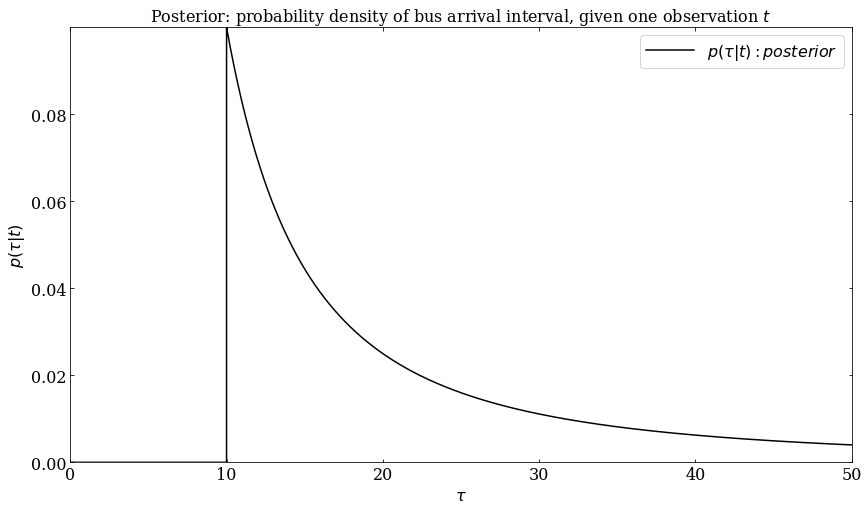

In [12]:
t = 10
tau = np.linspace(1e-7, 10*t, 100_000)
ptau = t/tau**2.
ptau[tau < 10] = 0.

fig, ax = plt.subplots(figsize=(14, 8))
plt.plot(tau, ptau, ls='-', c='black', label=r'$p(\tau|t): posterior$')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$p(\tau|t)$')
plt.xlim(0, 5*t)
plt.title('Posterior: probability density of bus arrival interval, given one observation $t$')
plt.legend()
plt.show() 

In [13]:
# numerically compute the cumulative distribution function (CDF) for p(tau)
dtau = tau[1] - tau[0]
cdf = (ptau*dtau).cumsum()

# find the \tau in the CDF for which the CDF is equal to 0.5
"median 𝝉 = %.2f" % np.interp(0.5, cdf, tau)

'median 𝝉 = 20.00'

The median $\tau$ given by the posterior $p(\tau \,|\, t,I)$ is now equal to $2t$, 
in agreement with our common sense expectations!

An interesting side result is that the p% quantiles 
are equal to ($1-t/\tau$); for example, the 95% confidence region for $\tau$, 
or **the credible region**, spans $1.03 t < \tau < 40 t$. If we waited for a bus 
for just 1 minute, then, adopting the usual 95% confidence region, we cannot reject the 
possibility that $\tau$ is as large as 40 minutes. 

Equivalently, if we waited for a 
bus for 1 minute, we can paraphrase Laplace and say that “it is a bet of 20 against 1 
that the bus will arrive in the interval between 0.03 minutes and 39 minutes from now.”

### What just happened

* All good properties of maximum likelihood estimators are ***asymptotic***. I.e., they apply when $N \rightarrow \infty$. This problem is the exact opposite (a single measurement!).
* There's significant prior information we're relying on (that all intervals are equally likely). MLE doesn't take that into account.
* Using classical (frequentist) statistics, we have to recognize these facts and apply a different technique.
* **Bayesian approach is clearer: the same principle applies and should be followed whether there's one or infinitely many data points.**

This reduced "cognitive load" is major practical advantage of the Bayesian approach.

### The Subjectivity of Priors

* An issue (the key issue?) with the Bayesian approach is that the choice of prior is seen as subjective. Sometimes reasonable people can disagree on the proper choice of priors.

Example: What is [the right prior to choose for binomial trials](https://en.wikipedia.org/wiki/Beta_distribution#Effect_of_different_prior_probability_choices_on_the_posterior_beta_distribution) (i.e., a coin toss)?

However:
* There are principles (such as the ones above) that *can* lead two people with the same information to choose the same prior, and...
* ... once the posterior is dominated by data, the choice of initial prior ceases to matter.

> “Far better an approximate answer to the right question, which is often vague, than an exact answer to the wrong question, which can always be made precise.” 

-- John Tukey, American matematician

**You will explore these issues in your homework this week!**

## Bayesian Model Parameter Estimation for Multiple Parameters

Consider the case of measuring the (one-dimensional) location of an object, $\mu$ (e.g., the right ascension of a quasar), with an apparatus that add some random error to each measurement. It is known that the errors are normally distributed and homoscedastic (i.e., have the same $\sigma$), but the value of $\sigma$ is not known.

We wish to determine both $\mu$ (location of the object) and $\sigma$ (precision of the instrument) from the data.

The Bayes theorem tells us that:

$$p(\mu, \sigma|\{x_i\},I) \propto p(\{x_i\}|\mu,\sigma,I) p(\mu,\sigma|I) $$.

### Likelihood

As before we have:
$$p(\{x_i\}|\mu,\sigma,I) = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right),$$
.

### Prior 

For the prior, we adopt:

$$p(\mu,\sigma|I) = p(\mu | I) \cdot p(\sigma | I) \propto \frac{1}{\sigma}$$

because $\mu$ is translationally invariant, $\sigma$ is scale invariant, and we assume they're independent (all errors are equally possible for any measured position and vice versa).

### Posterior

We multiply the prior, and likelihood, normalize, and find the posterior to be equal to:

$$p(\mu,\sigma|\{x_i\},I) = C\frac{1}{\sigma^{(N+1)}}\prod_{i=1}^N \exp\left( \frac{-(x_i-\mu)^2}{2\sigma^2}  \right),$$

where

$$C = (2\pi)^{-N/2}(\mu_{\rm max}-\mu_{\rm min})^{-1} \left[\ln \left( \frac{\sigma_{\rm max}}{\sigma_{\rm min}}\right) \right]^{-1}.$$

### A Brief Detour: Sufficient Statistics
The log of the posterior of this pdf is

$$\ln[p(\mu,\sigma|\{x_i\},I)] = {\rm constant} - (N+1)\ln\sigma - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma^2}.$$

This expression has $x_i$ in it, which is fine but annoying (we have to carry all measurements around!). We can instead rewrite it in terms of the sample mean, $\overline{x}$, and sample variance, $V (=s^2)$.  N.b. -- the reason that this is algebraically possible is because our likelihood was Gaussian.

Skipping over the math details (see textbook $\S$5.6.1), we find

$$\ln[p(\mu,\sigma|\{x_i\},I)] = {\rm constant} - (N+1)\ln\sigma - \frac{N}{2\sigma^2}\left( (\overline{x}-\mu)^2 + V  \right).$$

Note that this expression only contains the 2 parameters that we are trying to determine: $(\mu,\sigma)$ and 3 values that we can determine directly from the data: $(N,\overline{x},V)$. These three data-based values 
fully encapsulate our dataset and are called ***sufficient statistics***.

Load and execute the next cell to visualize the posterior pdf for the case of $(N,\overline{x},V)=(10,1,4)$.  Remember to change `usetex=True` to `usetex=False` if you have trouble with the plotting.  Try changing the values of $(N,\overline{x},V)$. 

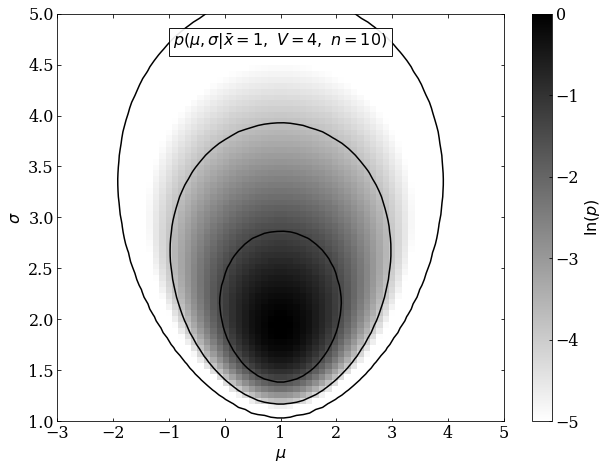

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.plotting.mcmc import convert_to_stdev

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=16, usetex=False)

def gauss_logL(xbar, V, n, sigma, mu):
    """Equation 5.57: gaussian likelihood"""
    return (-(n + 1) * np.log(sigma)
            - 0.5 * n * ((xbar - mu) ** 2 + V) / sigma ** 2)

#------------------------------------------------------------
# Define the grid and compute logL
sigma = np.linspace(1, 5, 70)
mu = np.linspace(-3, 5, 70)
xbar = 1
V = 4
n = 10

logL = gauss_logL(xbar, V, n, sigma[:, np.newaxis], mu)
logL -= logL.max()

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 7.5))
plt.imshow(logL, origin='lower',
           extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap=plt.cm.binary,
           aspect='auto')
plt.colorbar().set_label(r'$\ln(p)$')
plt.clim(-5, 0)

plt.contour(mu, sigma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='k')

plt.text(0.5, 0.93, r'$p(\mu,\sigma | \bar{x}=1,\ V=4,\ n=10)$',
         bbox=dict(ec='k', fc='w', alpha=0.9),
         ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

plt.show()



### Nuisance parameters and marginalization

Assume a case where $\sigma$ is not crucially important to what we are after, e.g. it may 
simply represent how good our measuring apparatus is - what we might get a Nobel prize for 
is $\mu$! Therefore, what we want is $p(\mu|\{x_i\},I)$, rather than $p(\mu,\sigma|\{x_i\},I)$.

We can get the former from the latter by the **marginalization over $\sigma$**, which means
integration of $p(\mu,\sigma|\{x_i\},I)$ over $\sigma$: 

$$ p(\mu\,|\,\{x_i\},I) = \int_0^\infty p(\mu,\sigma|\{x_i\},I) d\sigma$$

and thus (using the substitution $t$ = 1/$\sigma$ and integration by parts)

$$ p(\mu\,|\,\{x_i\},I) \propto \left(1 + \frac{(\overline{x}-\mu)^2}{V} \right)^{-N/2}. $$

It is easy to show that this result corresponds to [Student’s t distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) with 
k = N-1 degrees of freedom for the variable $t = (x-\mu)/(s/\sqrt{N})$, where $s$ is the sample 
standard deviation. Student’s t distribution is symmetric and bell shaped, but with heavier 
tails than for a Gaussian distribution.

**Hold on!** This is not a Gaussian distribution promised by the Central Limit Theorem!!!

That's fine! **The CLT promised a Gaussian only for large N**. Indeed, the above expression
(Student's t distribution) morphs into a Gaussian for large N - let's check!

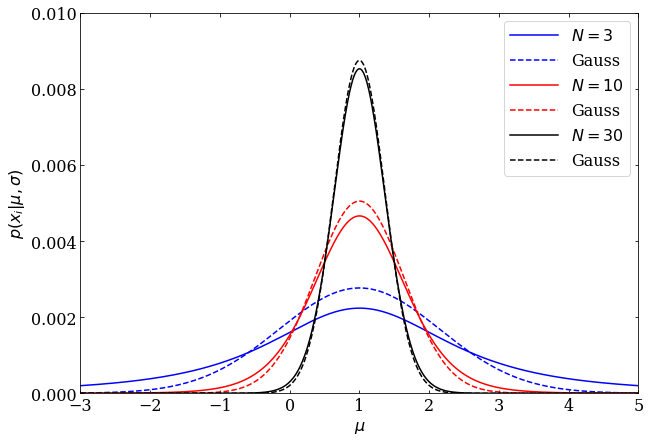

In [15]:
### let's see how Student's t distribution morphs into Gaussian distribution
# let's first choose mean x and variance as in the previous example
mu = np.linspace(-3, 5, 1000)
xbar = 1.0
V = 4.0

# and now let's generate p(mu) for N=3, 10 and 20
def compute_pmu(mu, xbar, V, N):
    p = (1 + (xbar - mu) ** 2 / V) ** (-0.5 * N)
    return p / np.sum(p)
#
N1 = 3
pmu1 = compute_pmu(mu,xbar,V,N1)
G1 = norm(xbar, np.sqrt(V/N1)).pdf(mu) 
G1norm = G1 / np.sum(G1)
N2 = 10
pmu2 = compute_pmu(mu,xbar,V,N2)
G2 = norm(xbar, np.sqrt(V/N2)).pdf(mu) 
G2norm = G2 / np.sum(G2)
N3 = 30
pmu3 = compute_pmu(mu,xbar,V,N3)
G3 = norm(xbar, np.sqrt(V/N3)).pdf(mu) 
G3norm = G3 / np.sum(G3)
 
## plot
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(mu, pmu1, ls='-', c='blue', label=r'$N=3$')
plt.plot(mu, G1norm, ls='--', c='blue', label=r'Gauss')
plt.plot(mu, pmu2, ls='-', c='red', label=r'$N=10$')
plt.plot(mu, G2norm, ls='--', c='red', label=r'Gauss')
plt.plot(mu, pmu3, ls='-', c='black', label=r'$N=30$')
plt.plot(mu, G3norm, ls='--', c='black', label=r'Gauss')

plt.xlim(-3, 5)
plt.ylim(0, 0.01)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.legend()
plt.show() 

The main result here is that **for smallish N ($<$10 or so), $p(\mu)$ is not Gaussian!** 

The code above can be used to compute $p(\mu)$ for arbitrary values of N, $\overline{x}$ and V.

For large N, Gaussian is a good approximation of $p(\mu)$.

And finally, this shows the importantce of beer to statistics, and statistics to beer. If confused by this statement, Google for "William Sealy Gosset"!

## What Have We Learned

* Bayesian definition considers probability as quantified belief (quantified knowledge). That lets us reason about the probabilities of model parameters (and of entire hypotheses).
* Bayesian framework gives us one, simple, universal, rule (Bayes rule) for inference, given new data.
* The price we pay is in the need to specify a prior (which may not be objectivelly possible all the time), and the computational cost.